Building a churn predictor from the Bank dataset.


In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

#Load the dataset and explore the variables.

In [2]:
ds = pd.read_csv('customer_churn.csv')

How is the dataset?

In [3]:
ds.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [270]:
# To understand the data

In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
ds.shape

(7043, 21)

Cleaning and Wrangling of the dataset

In [6]:
ds.describe(include = "all")

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,5921-NGYRH,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [7]:
ds.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
cols = []
for i in range(len(ds.columns)):
    cols.append(ds.columns[i].lower().replace(' ','_'))
ds.columns = cols
print(ds.columns)

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')


In [9]:
ds.dtypes
#sed one problem early on you missed, incorrect data types 

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [10]:
ds.isna().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [11]:
ds.select_dtypes(float)

,monthlycharges
0,29.85
1,56.95
2,53.85
3,42.30
4,70.70
...,...
7038,84.80
7039,103.20
7040,29.60
7041,74.40


In [12]:
len(ds)

7043

In [13]:
ds.select_dtypes(object)

,customerid,gender,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,totalcharges,churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,1990.5,No
7039,2234-XADUH,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),7362.9,No
7040,4801-JZAZL,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,346.45,No
7041,8361-LTMKD,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,306.6,Yes


In [14]:
ds.select_dtypes(int)

,seniorcitizen,tenure
0,0,1
1,0,34
2,0,2
3,0,45
4,0,2
...,...,...
7038,0,24
7039,0,72
7040,0,11
7041,1,4


Cleaning Dataset

In [282]:
# check for multicollinearity

In [17]:
import matplotlib .pyplot as plt
import seaborn as sns


In [18]:
corr_matrix = ds.corr()


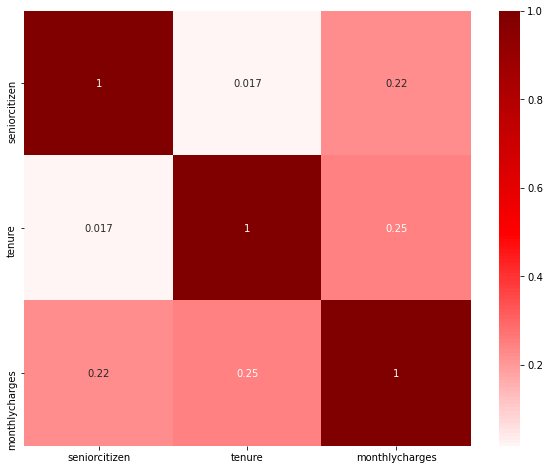

In [19]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr_matrix,
           cmap='seismic',
           center=0,
           annot=True,
           );


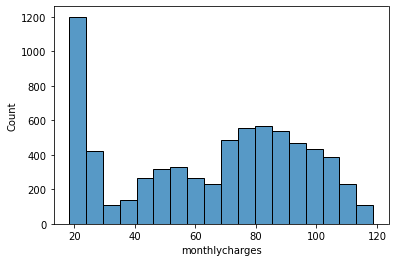

In [21]:
sns.histplot(ds['monthlycharges'])
plt.show()

In [22]:
ds['monthlycharges'].describe()


count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: monthlycharges, dtype: float64

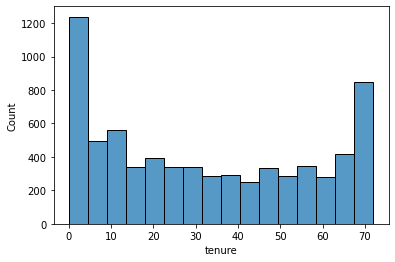

In [23]:
sns.histplot(ds['tenure'])
plt.show()

In [24]:
ds['tenure'].describe()


count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

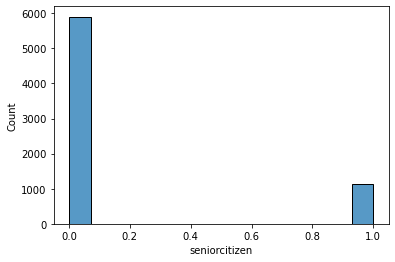

In [25]:
sns.histplot(ds['seniorcitizen'])
plt.show()

In [26]:
ds['seniorcitizen'].describe()


count    7043.000000
mean        0.162147
std         0.368612
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: seniorcitizen, dtype: float64

Processing

In [299]:
# Labeling of the Categorical columns

Frequency analysis of column:  gender
Frequency analysis of column:  partner
Frequency analysis of column:  dependents
Frequency analysis of column:  phoneservice
Frequency analysis of column:  multiplelines
Frequency analysis of column:  internetservice
Frequency analysis of column:  onlinesecurity
Frequency analysis of column:  onlinebackup
Frequency analysis of column:  deviceprotection
Frequency analysis of column:  techsupport
Frequency analysis of column:  streamingtv
Frequency analysis of column:  streamingmovies
Frequency analysis of column:  contract
Frequency analysis of column:  paperlessbilling
Frequency analysis of column:  paymentmethod
Frequency analysis of column:  totalcharges
Frequency analysis of column:  churn


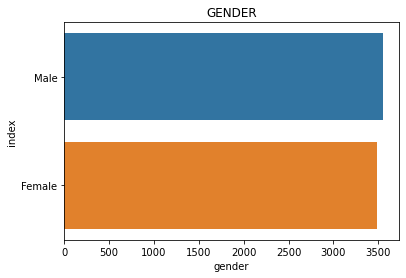

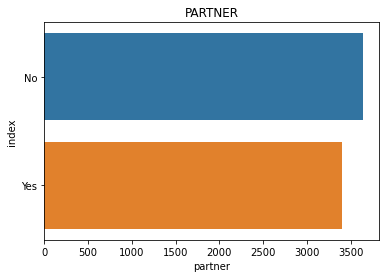

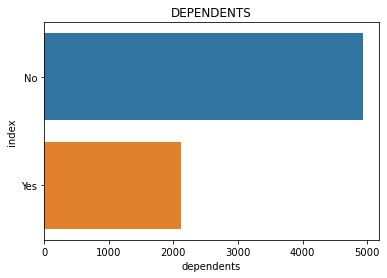

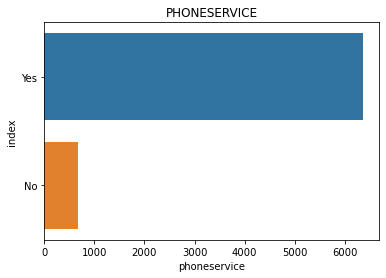

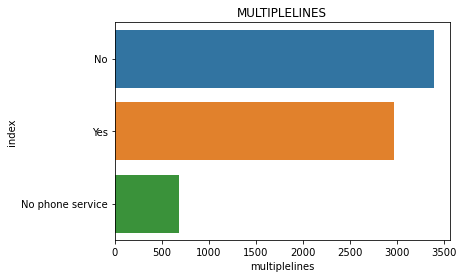

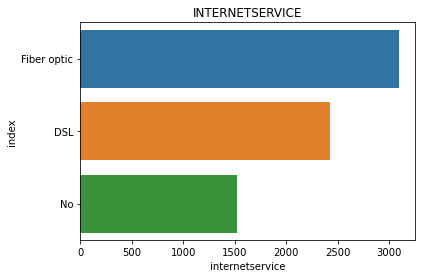

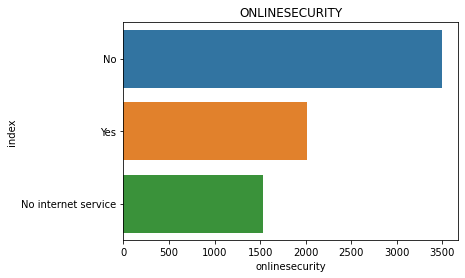

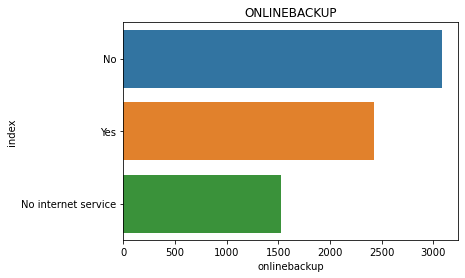

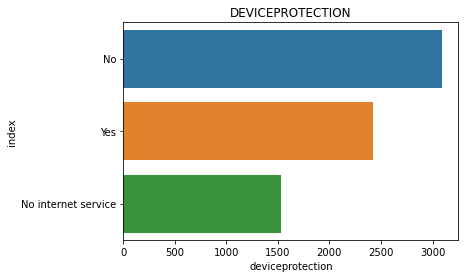

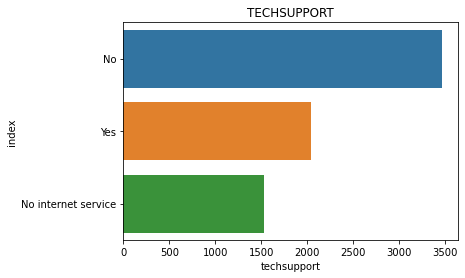

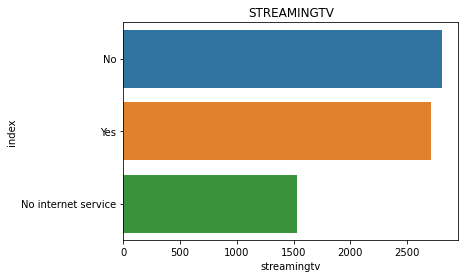

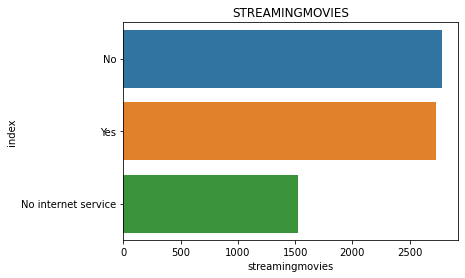

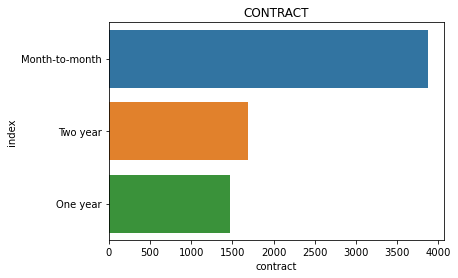

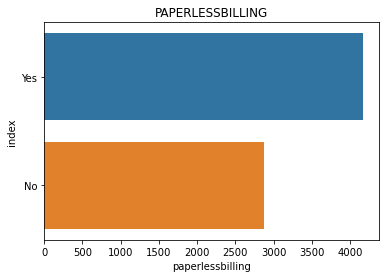

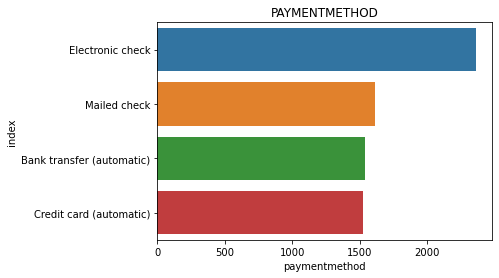

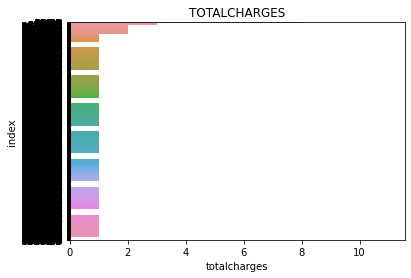

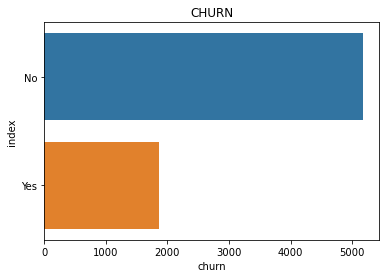

<Figure size 432x288 with 0 Axes>

In [36]:
#SED drop customerid column first as very unique 
ds = ds.drop(['customerid'], axis=1)
cols_cat = list(ds.select_dtypes(include=['object']).columns)

for col in cols_cat:
    print("Frequency analysis of column: ",col)
    my_data = ds[col].value_counts().reset_index()
    ax = sns.barplot(x=col, y="index", data = my_data).set_title(col.upper())
    plt.figure()
    print


In [49]:
#SED repeated code marked as # 
cat = list(ds.select_dtypes(include = np.object))
#for col in cat:
    #print("Frequency analysis of column: ",col)
    #my_data = ds[col].value_counts().reset_index()
    #ax = sns.barplot(x=col, y="index", ds = my_data).set_title(col.upper())
    #plt.figure()
    
cat

['gender',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'totalcharges',
 'churn']

In [38]:
import numpy as np # SED you already had this 
from sklearn.preprocessing import Normalizer

X = ds.select_dtypes(include = np.number)
# SED to save confusion, maybe set this as X_num 


In [39]:
X.head()

,seniorcitizen,tenure,monthlycharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70


In [40]:
transformer = Normalizer()
transformer.fit(X)
x_normalized = transformer.transform(X)


In [41]:
x = pd.DataFrame(x_normalized, columns=X.columns)
#SED good job on normalising the numerical columns 
#but i think senior citizen is a y/N and should have been made into an object type earlier 

In [42]:
x

,seniorcitizen,tenure,monthlycharges
0,0.00000,0.033482,0.999439
1,0.00000,0.512610,0.858622
2,0.00000,0.037115,0.999311
3,0.00000,0.728628,0.684910
4,0.00000,0.028277,0.999600
...,...,...,...
7038,0.00000,0.272322,0.962206
7039,0.00000,0.572182,0.820127
7040,0.00000,0.348346,0.937366
7041,0.01342,0.053681,0.998468


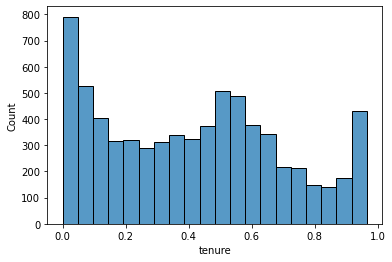

In [43]:
#SED have a look at the distribution after applying a normalizer to see if the desired result was achieved 
sns.histplot(x['tenure'])
plt.show()

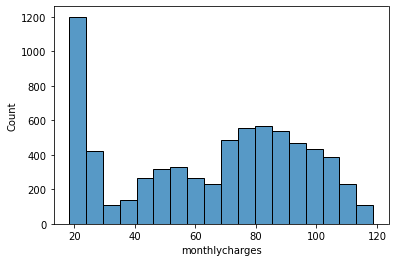

In [44]:
sns.histplot(ds['monthlycharges'])
plt.show()

In [224]:
ds

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [46]:
#SED just checking in what cat looks like
cat

['gender',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'totalcharges',
 'churn']

In [63]:
# btw this is another good reason to have already dropped customerid- we would have thousands of columns otherwise :) 
categorical = pd.get_dummies(cat, columns=['gender', 'partner', 'dependents', 'phoneservice' , 'multiplelines','internetservice','onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport' , 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod','churn'])
#sed i find its helpful to take a look at my categorical df and check what I have now 
categorical.head()
# this told me i had accidentally dropped churn.
# not a problem if we pull churn out separately as y, from ds but in this case i just removed the drop first column param. 

,churn,contract,dependents,deviceprotection,gender,internetservice,multiplelines,onlinebackup,onlinesecurity,paperlessbilling,partner,paymentmethod,phoneservice,streamingmovies,streamingtv,techsupport,totalcharges
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [59]:
X.head()

,seniorcitizen,tenure,monthlycharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70


In [60]:
#sed always use () after head
categorical.head()

,churn,contract,dependents,deviceprotection,gender,internetservice,multiplelines,onlinebackup,onlinesecurity,paperlessbilling,partner,paymentmethod,phoneservice,streamingmovies,streamingtv,techsupport,totalcharges
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
categorical['churn_Yes'].value_counts()
#sed column does not exist 


In [62]:
# SED adding a value counts check for the dependent variable ( churn =Y)
categorical['churn'].value_counts()
# sed as you can see we have used the cat variable for the dummies, which actually has just a few rows(its a list)
# need to re run the dummies procedure on a categorical dataframe 

0    16
1     1
Name: churn, dtype: int64

In [65]:
#sed i have added a line in to create X_cat based on object 
X_cat = ds.select_dtypes(include = np.object)
X_cat.head()

,gender,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,totalcharges,churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes


In [70]:
#SED total charges has crept in as an object type - dtype change needed
#X_cat = X_cat.drop(['totalcharges'], axis=1)
X_cat.head()

,gender,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [71]:
#sed redo dummies 
categorical2 = pd.get_dummies(X_cat, columns=['gender', 'partner', 'dependents', 'phoneservice' , 'multiplelines','internetservice','onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport' , 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod','churn'],drop_first=True )

categorical2.head()

,gender_Male,partner_Yes,dependents_Yes,phoneservice_Yes,multiplelines_No phone service,multiplelines_Yes,internetservice_Fiber optic,internetservice_No,onlinesecurity_No internet service,onlinesecurity_Yes,...,streamingtv_Yes,streamingmovies_No internet service,streamingmovies_Yes,contract_One year,contract_Two year,paperlessbilling_Yes,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,churn_Yes
0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,1,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,1
3,1,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1


In [72]:
#sed amended to reflect to new categorical 
#sort out the categoricals 
y= categorical2['churn_Yes']
categorical2=categorical2.drop(['churn_Yes'], axis=1)
categorical2


,gender_Male,partner_Yes,dependents_Yes,phoneservice_Yes,multiplelines_No phone service,multiplelines_Yes,internetservice_Fiber optic,internetservice_No,onlinesecurity_No internet service,onlinesecurity_Yes,...,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No internet service,streamingmovies_Yes,contract_One year,contract_Two year,paperlessbilling_Yes,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,0,1,0,0,0,1,...,0,1,0,1,1,0,1,0,0,1
7039,0,1,1,1,0,1,1,0,0,0,...,0,1,0,1,1,0,1,1,0,0
7040,0,1,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
7041,1,1,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [73]:
# bring the numerical data (scaled)in with the x cat
X = np.concatenate((x_normalized, categorical2),axis=1)


In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split



In [310]:
#apply model

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 33)


In [ ]:
#sed not needed - duplicate of the above import sklearn.linear_model as sk
#sed this is a diff model logreg = sk.LogisticRegressionCV()
#logreg.fit(predictor_var,outcome_var)

In [78]:
#sed slight typos over instead of ovr, solve instead of solver, LogisticRegression must be in capitals per the import 
classification = LogisticRegression(random_state=0, solver ='lbfgs', max_iter = 400, multi_class = 'ovr').fit(X_train, y_train)

In [79]:
# Not Complete.(To be Continued...
#sed all thats left is to evaluate the accuracy, visualise the accuracy -- and you have yourself a working model !

In [82]:
#sed ill get you started with an accuracy score 
from sklearn.metrics import accuracy_score 
predictions = classification.predict(X_test)
accuracy_score(y_test, predictions)

0.8001135718341851

In [ ]:
#sed try adding in a confusion matrix 